# QQQ vs DIA
### Entry Threshold:	 | Exit Threshold:	0.50 | Max Duration:		
### MA Period:	30 | MA Type:	SMA	StdDev | Period:	30 | Total ROI:	128.91 % % | CAGR:	35.25 % %	 | Max. DD:	26.15 %
### Sharpe Ratio:	1.926

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [2]:
start= datetime.datetime(2017, 1, 1)  # The start of the year for example
end= datetime.datetime(2020, 9, 30)

In [3]:
ticker_1 = "DIA"
ticker_2 = "QQQ"

In [4]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [5]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,281.579987,280.609985,281.070007,281.359985,1300300.0,281.359985
2019-11-27,281.910004,281.010010,281.609985,281.910004,1786300.0,281.910004
2019-11-29,281.570007,280.839996,281.299988,280.950012,811900.0,280.950012
2019-12-02,281.489990,278.200012,281.450012,278.200012,2544300.0,278.200012
2019-12-03,275.640015,273.619995,275.429993,275.510010,3812736.0,275.510010


In [6]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,204.869995,204.050003,204.320007,204.610001,14780600.0,204.610001
2019-11-27,206.050003,204.889999,205.139999,206.039993,16963100.0,206.039993
2019-11-29,205.830002,205.000000,205.520004,205.100006,9854600.0,205.100006
2019-12-02,205.179993,201.779999,205.110001,203.000000,28007000.0,203.000000
2019-12-03,201.490005,193.785004,200.320007,201.410004,30392788.0,201.410004


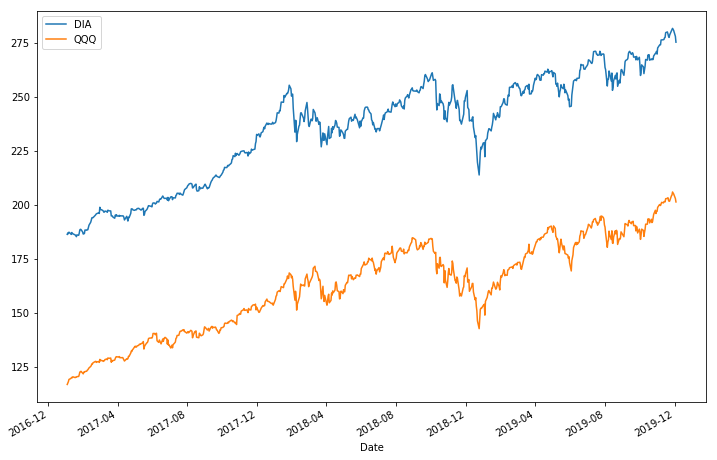

In [7]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [8]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

In [9]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

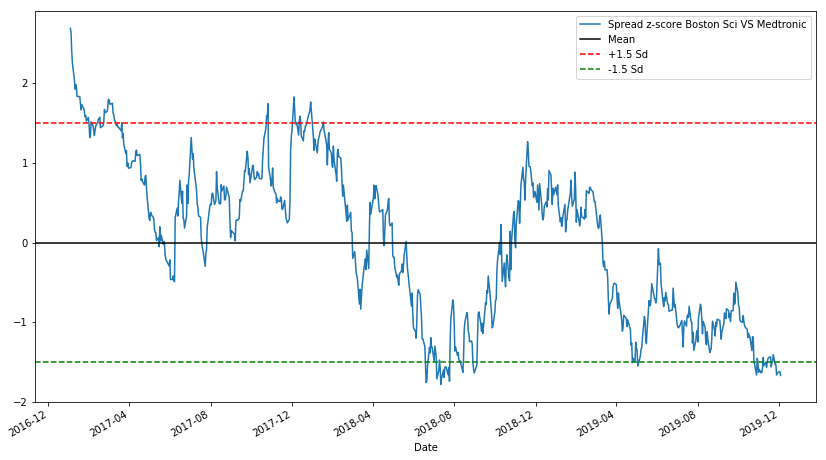

In [10]:
zscore(spread_ratio).plot(figsize=(14,8))
plt.axhline(zscore(spread_ratio).mean(), color='black')
plt.axhline(1.5, c='r', ls='--')
plt.axhline(-1.5, c='g', ls='--')
plt.legend(['Spread z-score Boston Sci VS Medtronic', 'Mean', '+1.5 Sd', '-1.5 Sd']);

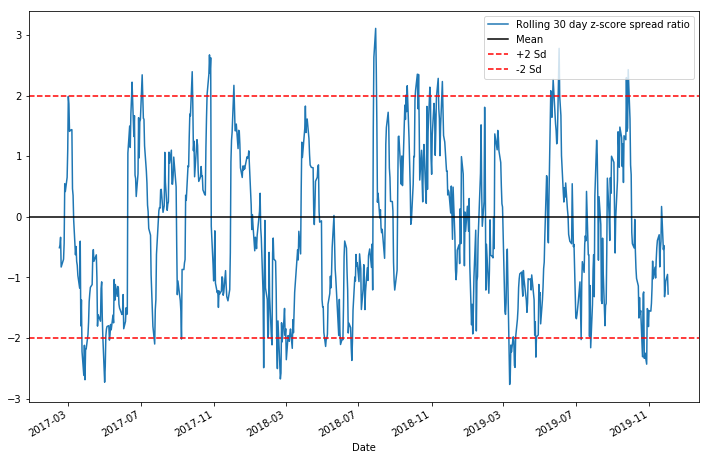

In [11]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(30).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.00, color='red', linestyle='--')
plt.axhline(-2.00, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+2 Sd', '-2 Sd']);

In [12]:
from statsmodels.tsa.stattools import coint

In [13]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [14]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [15]:
print('----------Co-Integration Test-------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------Co-Integration Test-------------------
T-stat for the pair DIA VS QQQ: -3.013182952474602
Alpha value for the T-stat:  0.1071050804090477
--------------------------------------
T-stat 99%:  -3.9114230750840826
T-stat 95%:  -3.3444670512810992
T-stat 90%:  -3.050233250302549


In [16]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('\n-----------Augmented Dickey-Fuller Test: ----------\n')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.1:
        print("\nstrong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary\n")
    else:
        print("\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-mean reverting\n ")
    
    print("Dickey Fuller Confidence Intervals:  ", adfuller(spread_ratio)[4])

adf_check(spread_ratio)


-----------Augmented Dickey-Fuller Test: ----------

ADF Test Statistic : -2.728372870168348
p-value : 0.06925588842256086
#Lags Used : 0
Number of Observations Used : 734

strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

Dickey Fuller Confidence Intervals:   {'1%': -3.439290485895927, '5%': -2.8654856985173414, '10%': -2.568871126669587}


In [17]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.97974518],
       [0.97974518, 1.        ]])

In [18]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[621.89790759, 527.43003473],
       [527.43003473, 465.99831365]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [19]:
zscore_30_1_ratio[-20:]

Date
2019-11-05   -1.429951
2019-11-06   -1.171782
2019-11-07   -0.731089
2019-11-08   -1.022134
2019-11-11   -0.832107
2019-11-12   -1.009591
2019-11-13   -0.713295
2019-11-14   -0.510806
2019-11-15   -0.389626
2019-11-18   -0.294816
2019-11-19   -0.825397
2019-11-20   -0.526938
2019-11-21   -0.406130
2019-11-22    0.171732
2019-11-25   -0.538657
2019-11-26   -0.473660
2019-11-27   -1.318286
2019-11-29   -1.062987
2019-12-02   -0.949935
2019-12-03   -1.273950
Name: Adj Close, dtype: float64

In [20]:
spread_ratio[-20:]

Date
2019-11-05    1.370073
2019-11-06    1.373109
2019-11-07    1.379725
2019-11-08    1.374339
2019-11-11    1.376632
2019-11-12    1.373314
2019-11-13    1.376737
2019-11-14    1.378722
2019-11-15    1.379626
2019-11-18    1.380164
2019-11-19    1.373506
2019-11-20    1.376206
2019-11-21    1.376896
2019-11-22    1.381658
2019-11-25    1.374988
2019-11-26    1.375104
2019-11-27    1.368230
2019-11-29    1.369820
2019-12-02    1.370443
2019-12-03    1.367906
Name: Adj Close, dtype: float64

In [21]:
#differenced spread
t_series_lag_1 = spread_ratio.diff(1)

In [22]:
#t_series_lag_1.plot(figsize=(12,8),label='Timeseries Lagged 1 day Z score')
#plt.axhline(0, color='red')
#plt.axhline(2.0, color='red', linestyle='--')
#plt.axhline(3.0, color='red', linestyle='-')
#plt.axhline(-3.0, color='red', linestyle='-')
#plt.axhline(-2.0, color='red',linestyle='--')
#plt.legend(['Lagged time series day z-score spread ratio', 'Mean', '2.0 Sd', '3.0 Sd']);

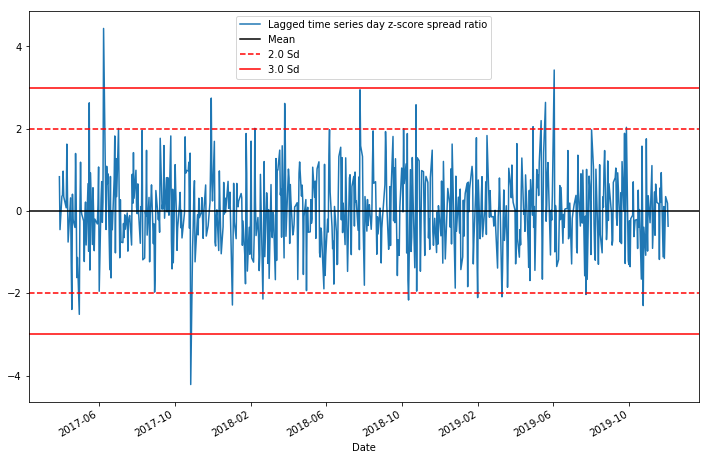

In [23]:
#1 day moving average of the price spread
spreadratio_t_series_lag_mavg_1 = t_series_lag_1.rolling(1).mean()

# Timeseries with one lag
spreadratio_t_series_lag_mavg_30 = t_series_lag_1.rolling(60).mean()

# Take a rolling 30 day standard deviation
std_dev_ratio = t_series_lag_1.rolling(30).std()

# Compute the z score for each day
zscore_t_series_lag = (spreadratio_t_series_lag_mavg_1 - spreadratio_t_series_lag_mavg_30)/std_dev_ratio



zscore_t_series_lag.plot(figsize=(12,8),label='Timeseries Lagged 1 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.0, color='red', linestyle='-')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Lagged time series day z-score spread ratio', 'Mean', '2.0 Sd', '3.0 Sd']);

In [24]:
#zscore_t_series_lag[-20:]

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
t_series_dropna = t_series_lag_1.dropna()

In [27]:
result = adfuller(t_series_dropna)
result

(-27.79767707311574,
 0.0,
 0,
 733,
 {'1%': -3.439302726125018,
  '5%': -2.8654910924750547,
  '10%': -2.5688740002680124},
 -4745.58896796168)

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

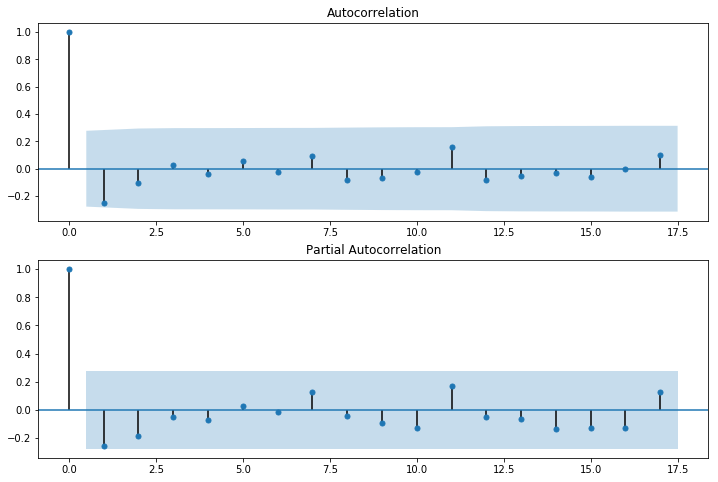

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(t_series_dropna.iloc[-50:],  ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(t_series_dropna.iloc[-50:], ax=ax2)

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model = statsmodels.tsa.arima_model.ARIMA(t_series_dropna, order=(1,0,1))
results = model.fit()
print(results.summary())

C:\Users\samar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  734
Model:                     ARMA(1, 1)   Log Likelihood                2452.682
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 04 Dec 2019   AIC                          -4897.363
Time:                        09:27:23   BIC                          -4878.969
Sample:                             0   HQIC                         -4890.269
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0003      0.000     -1.266      0.206      -0.001       0.000
ar.L1.Adj Close     0.8814      0.105      8.412      0.000       0.676       1.087
ma.L1.Adj Close    -0.9130      

# Estimating GARCH

In [32]:
from arch import arch_model